step 2 sql and EDA

works 
1.import csv using pandas in mysql
2.data cleaning and preprocessing using pandas and excel
3.exploratory data analysis using pandas and sql
4.data visualization using matplotlib and seaborn
4.some statastical analysis using numpy

In [10]:

from mysql import connector #first do this all time to connect with sql
connection = connector.connect(
    host="localhost",
    user="root",
    password="12345678",
    
    
)
cursor = connection.cursor()
cursor

In [11]:
query = 'show databases' #to show the databases saved in sql 
cursor.execute(query)
for db in cursor:
    print(db)

('ds_wd_e_b15',)
('information_schema',)
('mysql',)
('performance_schema',)
('redbus_data',)
('sakila',)
('sys',)
('world',)


In [15]:
query = 'use redbus_data'
cursor.execute(query)

In [4]:
query = 'show tables' # for show tables in sql
cursor.execute(query)
for tbl in cursor:
    print(tbl)

('government_buses',)
('private_buses',)
('redbus_data',)


In [5]:
query = 'drop table government_buses' #for delete the database from sql
cursor.execute(query)

In [6]:
query = 'drop table private_buses' #for delete the database from sql
cursor.execute(query)

In [7]:
query = 'drop table redbus_data' #for delete the database from sql
cursor.execute(query)

In [8]:
import pandas as pd

In [10]:
df = pd.read_csv(r'D:\guvi\REDBUS_PROJECT\PROJECT\bus_data.csv')
df

,bus_category,route_name,route_link,bus_name,bus_type,departing_time,duration,reaching_time,star_rating,price,seats_available
0,Government,Chennai to Coimbatore,https://www.redbus.in/bus-tickets/chennai-to-c...,KSRTC (Kerala) - 2312,Seater + AC,05:30,08:25,13:55:00,4.8,996.0,23
1,Government,Chennai to Coimbatore,https://www.redbus.in/bus-tickets/chennai-to-c...,KSRTC (Kerala) - 2312,Seater + AC,05:45,08:25,14:10:00,4.8,996.0,15
2,Private,Bangalore to Chennai,https://www.redbus.in/bus-tickets/bangalore-to...,Jabbar Travels,Sleeper + AC,06:00,06:20,12:20:00,4.3,600.0,32
3,Private,Bangalore to Chennai,https://www.redbus.in/bus-tickets/bangalore-to...,Jabbar Travels,Sleeper + AC,06:15,06:20,12:35:00,4.3,600.0,8
4,Private,Bangalore to Chennai,https://www.redbus.in/bus-tickets/bangalore-to...,Jabbar Travels,Sleeper + AC,06:30,06:15,12:45:00,4.6,452.0,19
...,...,...,...,...,...,...,...,...,...,...,...
793,Private,Chennai to Coimbatore,https://www.redbus.in/bus-tickets/chennai-to-c...,Sri Auto Travels,Sleeper + AC,05:06,09:00,14:06:00,1.4,899.0,12
794,Private,Chennai to Coimbatore,https://www.redbus.in/bus-tickets/chennai-to-c...,AURA CONNECT,Sleeper + AC,06:01,08:00,14:01:00,2.3,2300.0,24
795,Private,Chennai to Coimbatore,https://www.redbus.in/bus-tickets/chennai-to-c...,AURA CONNECT,Sleeper + AC,05:07,08:00,13:07:00,2.3,2300.0,6
796,Private,Chennai to Coimbatore,https://www.redbus.in/bus-tickets/chennai-to-c...,JP TRANZ,Seater + AC,05:08,08:00,13:08:00,1.8,2500.0,41


In [11]:
df.info() # it gives all information of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bus_category     798 non-null    object 
 1   route_name       798 non-null    object 
 2   route_link       798 non-null    object 
 3   bus_name         798 non-null    object 
 4   bus_type         798 non-null    object 
 5   departing_time   798 non-null    object 
 6   duration         798 non-null    object 
 7   reaching_time    798 non-null    object 
 8   star_rating      798 non-null    object 
 9   price            798 non-null    float64
 10  seats_available  798 non-null    int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 68.7+ KB


In [13]:
df.isna()# true and false value 
'''each and every cell
false = not null Value
true  = null value
'''

'each and every cell\nfalse = not null Value\ntrue  = null value\n'

In [3]:
df.isna().sum() # how many null values are present in each cell

star_rating        0
price              0
seats_available    0
dtype: int64

finding the skewness of data 

skewness coefficientL 1.996588403864506e-08


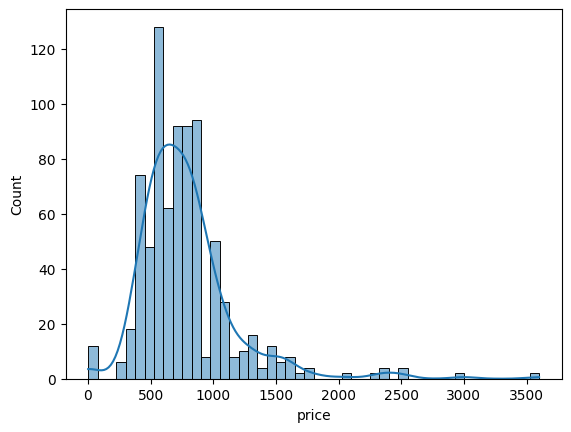

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'D:\guvi\REDBUS_PROJECT\PROJECT\bus_data.csv')
avg = df['price'].mean()
df['x-avg'] = df['price']-avg
df['x-avg_cube'] = (df['price']-avg)**3
df['x-avg_suare'] = (df['price']-avg)**2

s = (1/len(df))*sum(df['x-avg_cube'])/(1/len(df)*sum(df['x-avg_suare']))**3/2
print(f'skewness coefficientL {s}')
sns.histplot(df['price'],kde=True)
plt.show()


right  = tail is on left side (left sceued ); skeued = <0 less than 0 ;mean < median

corelation with heatmap

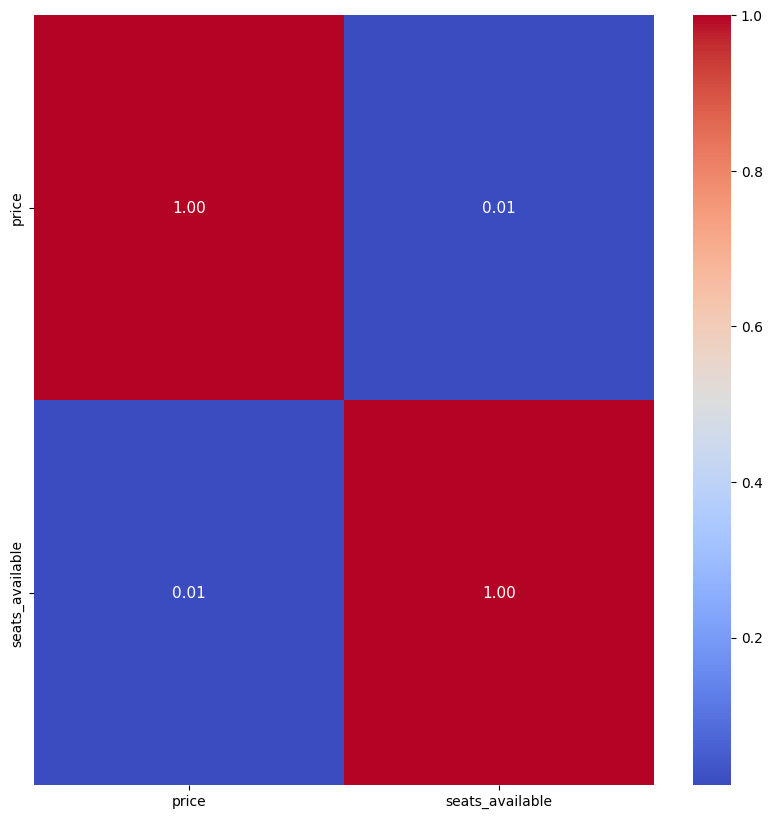

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'D:\guvi\REDBUS_PROJECT\PROJECT\bus_data.csv')
df.drop(['bus_category','route_name','route_link','bus_name','bus_type','departing_time','duration','reaching_time','star_rating'],axis=1,inplace=True)
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm',annot_kws={'size':11})# formate the data in 2 decimal places
plt.show()
#this is the all table corelation 1 or red is high and 0 is less 

multivariance alanysis  = 2 and more columns in 1 graph 

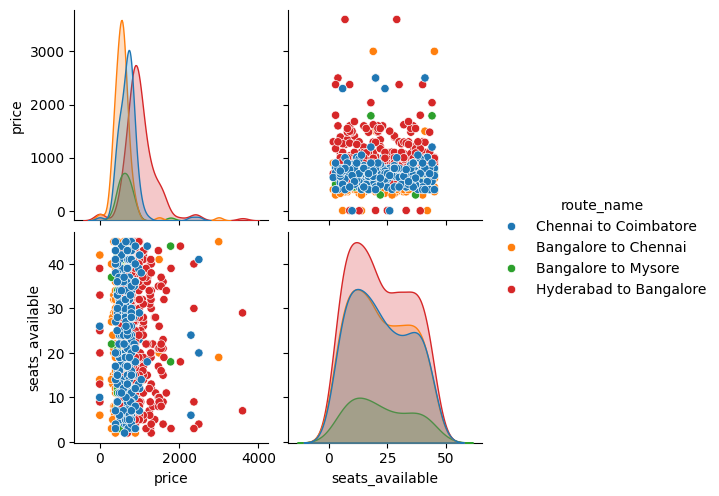

In [6]:
import seaborn as sns
df = pd.read_csv(r'D:\guvi\REDBUS_PROJECT\PROJECT\bus_data.csv')
# df.drop(['species'],axis=1,inplace=True)#axis=0 (rows),axis=1 (columns                 )
sns.pairplot(df,hue='route_name')
plt.show()

now we need to create the application using screamlit 